In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Length of the Train and Test sets: {len(x_train)}, {len(x_test)}")


Length of the Train and Test sets: 60000, 10000


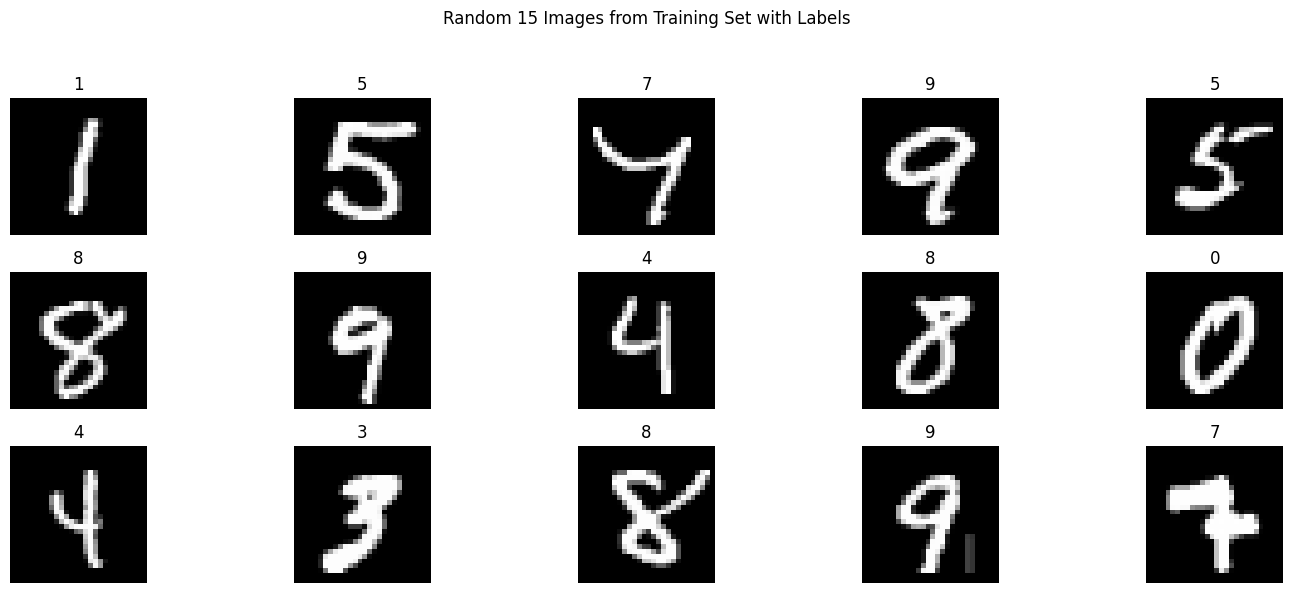

In [4]:
# Plot 15 random images from the training dataset
indices = np.random.choice(x_train.shape[0], 15, replace=False)
plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(y_train[idx]))
    plt.axis('off')
plt.suptitle('Random 15 Images from Training Set with Labels')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [5]:
# Improved model architectures with regularization

def create_improved_fc_model():
    """Fully Connected model with dropout and batch normalization"""
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(), 
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

def create_improved_cnn_fc_model():
    """CNN + FC model with dropout and batch normalization"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

def create_improved_deep_cnn_model():
    """Deep CNN with dropout, batch normalization, and residual-like connections"""
    model = models.Sequential([
        # First Conv Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        # Second Conv Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        # Third Conv Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [6]:
# Training function with callbacks
def train_evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    """Train model with early stopping and learning rate reduction"""
    # Callbacks for better training
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
    
    history = model.fit(
        x_train, y_train,
        epochs=25,  # Increased epochs since we have early stopping
        batch_size=128,  # Slightly larger batch size
        validation_split=0.15,  # Increased validation split
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{model_name} Results:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Training completed in {len(history.history['loss'])} epochs")
    print("-" * 50)
    
    return history

# Enhanced plotting function
def plot_training_curves(history, model_name):
    """Plot training curves with better formatting"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax1.set_title(f'{model_name} - Model Accuracy', fontsize=14)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title(f'{model_name} - Model Loss', fontsize=14)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [8]:
# Create and train improved models
print("Creating improved models...")
fc_model = create_improved_fc_model()
cnn_fc_model = create_improved_cnn_fc_model()
deep_cnn_model = create_improved_deep_cnn_model()

print("\nModel Summaries:")
print("=" * 60)
print("FC Model:")
fc_model.summary()
print("\n" + "=" * 60)
print("CNN + FC Model:")
cnn_fc_model.summary()
print("\n" + "=" * 60)
print("Deep CNN Model:")
deep_cnn_model.summary()

Creating improved models...

Model Summaries:
FC Model:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)


CNN + FC Model:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,250 (477.54 KB)

 Non-trainable params: 320 (1.25 KB)


Deep CNN Model:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,826 (839.16 KB)

 Trainable params: 214,122 (836.41 KB)

 Non-trainable params: 704 (2.75 KB)

In [9]:
# Train and evaluate each model
print("\n" + "=" * 60)
print("TRAINING PHASE")
print("=" * 60)

fc_history = train_evaluate_model(fc_model, x_train, y_train, x_test, y_test, "Improved FC Model")
cnn_fc_history = train_evaluate_model(cnn_fc_model, x_train, y_train, x_test, y_test, "Improved CNN + FC Model")
deep_cnn_history = train_evaluate_model(deep_cnn_model, x_train, y_train, x_test, y_test, "Improved Deep CNN Model")



TRAINING PHASE
Epoch 1/25


2025-09-25 03:47:27.922715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7246 - loss: 0.8821 - val_accuracy: 0.9077 - val_loss: 0.3137 - learning_rate: 0.0010
Epoch 2/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8606 - loss: 0.4733 - val_accuracy: 0.9139 - val_loss: 0.2973 - learning_rate: 0.0010
Epoch 3/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8697 - loss: 0.4486 - val_accuracy: 0.9163 - val_loss: 0.2909 - learning_rate: 0.0010
Epoch 4/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8691 - loss: 0.4480 - val_accuracy: 0.9206 - val_loss: 0.2786 - learning_rate: 0.0010
Epoch 5/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8670 - loss: 0.4576 - val_accuracy: 0.9202 - val_loss: 0.2820 - learning_rate: 0.0010
Epoch 6/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8645 - loss: 0.4652 - val_accuracy: 0.9211 - val_loss: 0.2827 - learning_rate: 0.0010
Epoch 7/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8682 - loss: 0.4509
Epoch


Plotting training curves...


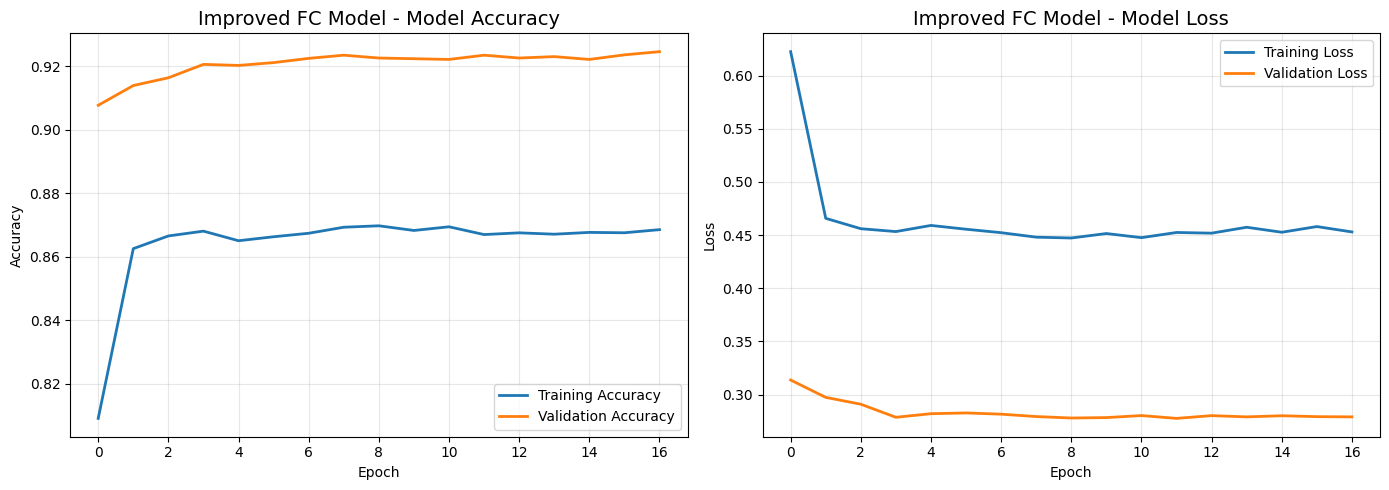

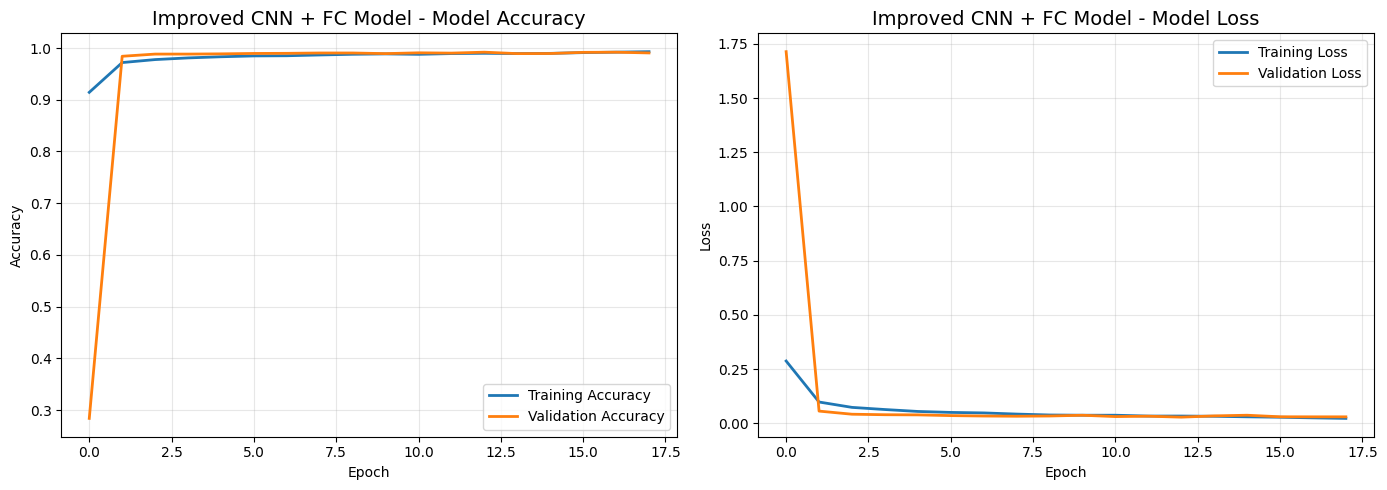

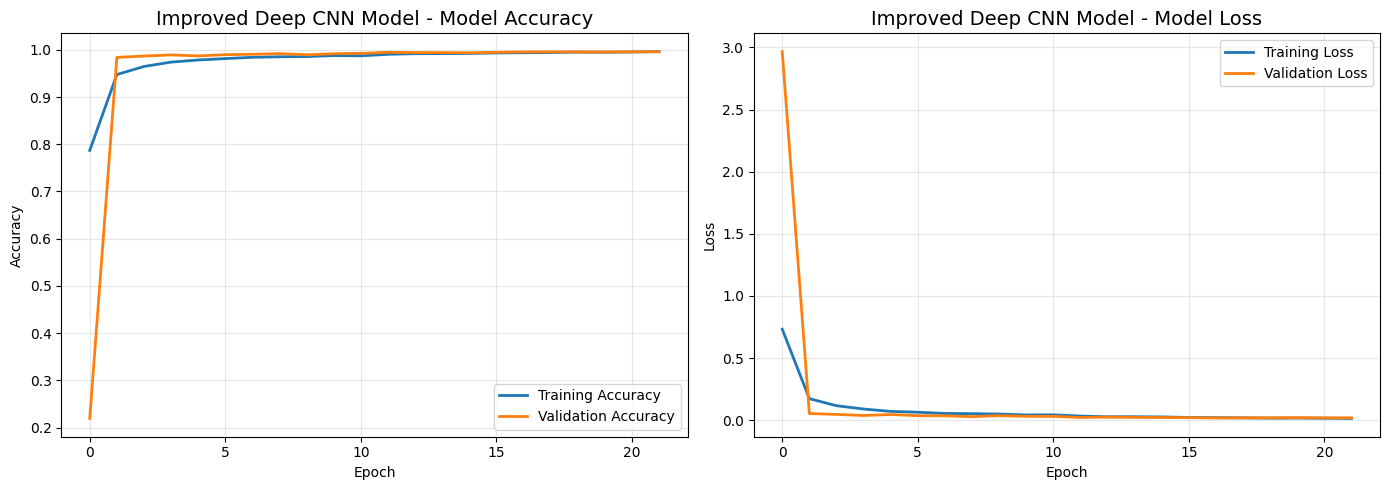

In [10]:
# Plot results
print("\nPlotting training curves...")
plot_training_curves(fc_history, "Improved FC Model")
plot_training_curves(cnn_fc_history, "Improved CNN + FC Model") 
plot_training_curves(deep_cnn_history, "Improved Deep CNN Model")

In [11]:
# Compare final results
print("\n" + "=" * 60)
print("FINAL COMPARISON")
print("=" * 60)

models_info = [
    ("Improved FC Model", fc_model, fc_history),
    ("Improved CNN + FC Model", cnn_fc_model, cnn_fc_history), 
    ("Improved Deep CNN Model", deep_cnn_model, deep_cnn_history)
]

for name, model, history in models_info:
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    final_val_acc = max(history.history['val_accuracy'])
    print(f"{name:25} - Test Acc: {test_acc:.4f}, Best Val Acc: {final_val_acc:.4f}")


FINAL COMPARISON
Improved FC Model         - Test Acc: 0.9174, Best Val Acc: 0.9246
Improved CNN + FC Model   - Test Acc: 0.9922, Best Val Acc: 0.9920
Improved Deep CNN Model   - Test Acc: 0.9953, Best Val Acc: 0.9958


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


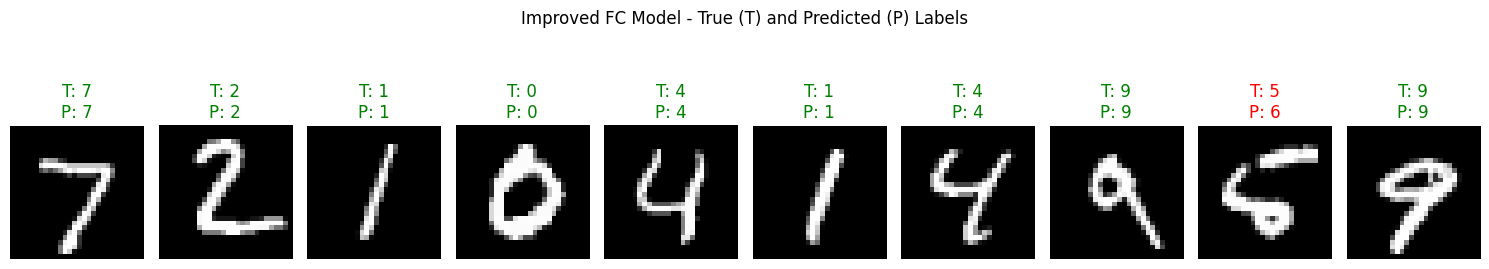

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


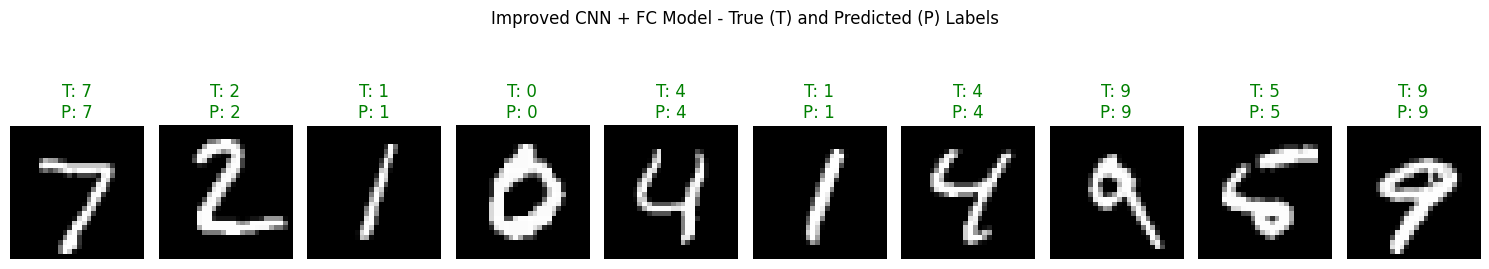

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


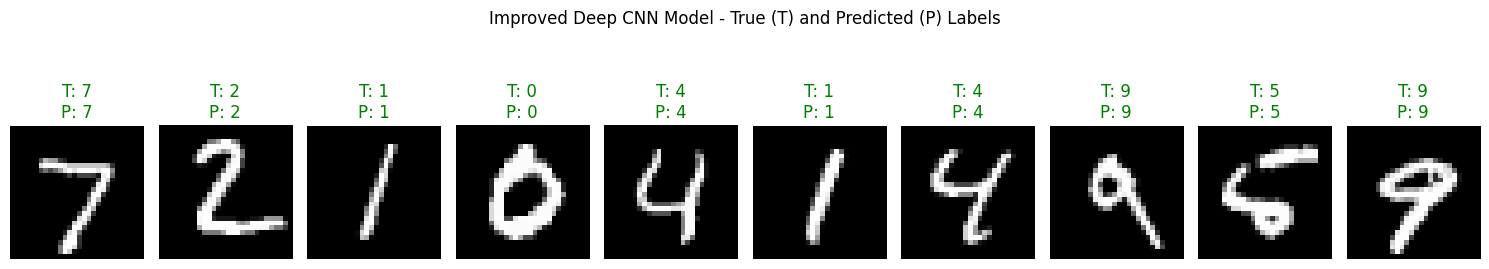

In [12]:
# Display true and predicted labels for test images for each model

def show_predictions(model, x_test, y_test, num_samples=10, model_name="Model"):
    """Show true and predicted labels with images for a given model."""
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)
    
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"T: {y_true_labels[i]}\nP: {y_pred_labels[i]}", color='green' if y_true_labels[i]==y_pred_labels[i] else 'red')
        plt.axis('off')
    plt.suptitle(f"{model_name} - True (T) and Predicted (P) Labels")
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    plt.show()

# Show predictions for each model
show_predictions(fc_model, x_test, y_test, num_samples=10, model_name="Improved FC Model")
show_predictions(cnn_fc_model, x_test, y_test, num_samples=10, model_name="Improved CNN + FC Model")
show_predictions(deep_cnn_model, x_test, y_test, num_samples=10, model_name="Improved Deep CNN Model")